In [ ]:
'''
Voting Ensemble Classifier (Random Forest + Gradient Boosting + MLP) with SMOTE
for predicting only Openness
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# === Load Data ===
df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/train/comb_train_liwc_embed.csv")

# === Features and Label ===
feature_cols = [col for col in df.columns if col.startswith("embed_") or col.startswith("liwc_")]
X = df[feature_cols].values
y = df["Openness"].values

# === Normalize ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# === SMOTE ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("SMOTE class distribution:", Counter(y_train_res))

# === Classifiers ===
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('mlp', mlp)],
    voting='soft',
    n_jobs=-1
)

# === Train and Evaluate ===
ensemble.fit(X_train_res, y_train_res)
y_pred = ensemble.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
report = classification_report(y_test, y_pred, zero_division=0)

print(f"\n=== OPENNESS ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score (macro): {f1:.4f}")
print(report)

# === Save Report ===
with open("/Users/arashalborz/Desktop/amiv_nlp_2025/classification/reports/ensemble_openness_with_smote.txt", "w") as f:
    f.write("Classification Report - Openness (Ensemble with SMOTE)\n")
    f.write(f"Accuracy: {acc:.4f}\nF1-score (macro): {f1:.4f}\n")
    f.write(report)

print("Saved report to ensemble_openness_with_smote.txt")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- After predictions are made (y_test and y_pred exist) ---
cm = confusion_matrix(y_test, y_pred, labels=ensemble.classes_)
labels = ensemble.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Openness')
plt.tight_layout()
plt.savefig("/Users/arashalborz/Desktop/amiv_nlp_2025/classification/reports/conf_matrix_openness.png")
plt.show()

SMOTE class distribution: Counter({'low': 586, 'medium': 586, 'high': 586})


/opt/anaconda3/envs/amiv_nlp_2025/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



=== OPENNESS ===
Accuracy: 0.4437
F1-score (macro): 0.3613
              precision    recall  f1-score   support

        high       0.57      0.61      0.59       251
         low       0.16      0.15      0.16        86
      medium       0.35      0.33      0.34       134

    accuracy                           0.44       471
   macro avg       0.36      0.36      0.36       471
weighted avg       0.43      0.44      0.44       471

Saved report to ensemble_openness_with_smote.txt



=== OPENNESS ===
Accuracy: 0.5032
F1-score (macro): 0.3841
              precision    recall  f1-score   support

        high       0.57      0.74      0.65       251
         low       0.21      0.12      0.15        86
      medium       0.42      0.31      0.36       134

    accuracy                           0.50       471
   macro avg       0.40      0.39      0.38       471
weighted avg       0.46      0.50      0.47       471

Saved report to ensemble_openness_no_smote.txt


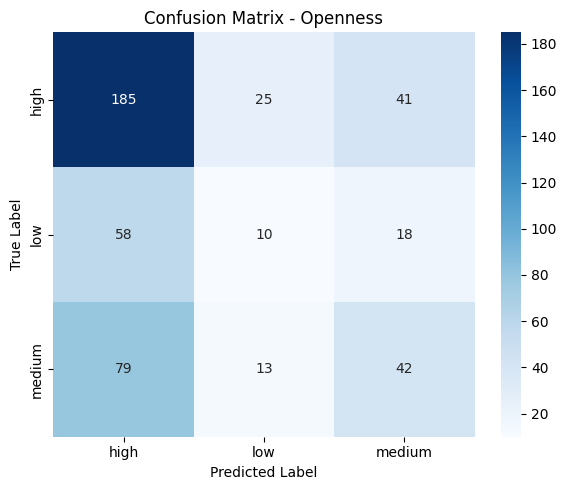

In [5]:
'''
Voting Ensemble Classifier (Random Forest + Gradient Boosting + MLP)
for predicting only Openness — NO SMOTE
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# === Load Data ===
df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/train/comb_train_liwc_embed.csv")

# === Features and Label ===
feature_cols = [col for col in df.columns if col.startswith("embed_") or col.startswith("liwc_")]
X = df[feature_cols].values
y = df["Openness"].values

# === Normalize ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# === Classifiers ===
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('mlp', mlp)],
    voting='soft',
    n_jobs=-1
)

# === Train and Evaluate ===
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
report = classification_report(y_test, y_pred, zero_division=0)

print(f"\n=== OPENNESS ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score (macro): {f1:.4f}")
print(report)

# === Save Report ===
with open("/Users/arashalborz/Desktop/amiv_nlp_2025/classification/reports/ensemble_openness_no_smote.txt", "w") as f:
    f.write("Classification Report - Openness (Ensemble NO SMOTE)\n")
    f.write(f"Accuracy: {acc:.4f}\nF1-score (macro): {f1:.4f}\n")
    f.write(report)

print("Saved report to ensemble_openness_no_smote.txt")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- After predictions are made (y_test and y_pred exist) ---
cm = confusion_matrix(y_test, y_pred, labels=ensemble.classes_)
labels = ensemble.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Openness')
plt.tight_layout()
plt.savefig("/Users/arashalborz/Desktop/amiv_nlp_2025/classification/reports/conf_matrix_openness.png")
plt.show()

In [ ]:
# --- After predictions are made (y_test and y_pred exist) ---


